# Лабораторная работа №1. Предварительная обработка данных#


## Выполнила Ерофеева А. Д. 15-АС


## Вариант: 5. Метеоритная защита земли.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

In [56]:
FB = pd.read_csv('cneos_fireball_data.csv')

In [57]:
FB.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


In [58]:
FB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 10 columns):
Peak Brightness Date/Time (UT)         719 non-null object
Latitude (deg.)                        539 non-null object
Longitude (deg.)                       539 non-null object
Altitude (km)                          307 non-null float64
Velocity (km/s)                        157 non-null float64
vx                                     157 non-null float64
vy                                     157 non-null float64
vz                                     157 non-null float64
Total Radiated Energy (J)              719 non-null float64
Calculated Total Impact Energy (kt)    719 non-null float64
dtypes: float64(7), object(3)
memory usage: 56.2+ KB


In [59]:
FB.describe()

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,307.000000,157.000000,157.000000,157.000000,157.000000,7.190000e+02,719.000000
mean,36.511726,17.950318,0.310828,-2.388535,-1.031847,8.812462e+11,1.387638
std,10.649462,6.057382,10.825425,11.415896,10.419010,1.405769e+13,16.598496
min,15.200000,9.800000,-35.400000,-43.500000,-28.700000,2.000000e+10,0.073000
25%,29.600000,13.700000,-7.300000,-11.200000,-9.100000,3.300000e+10,0.110000
50%,35.200000,16.900000,0.100000,-2.300000,0.300000,6.800000e+10,0.220000
75%,40.700000,19.800000,9.100000,4.800000,6.700000,1.510000e+11,0.440000
max,74.000000,49.000000,21.500000,25.800000,23.700000,3.750000e+14,440.000000


In [60]:
FB.shape

(719, 10)

In [61]:
FB_copy = FB.copy()
FB_copy = FB_copy.drop_duplicates()
FB_copy = FB_copy.dropna()
FB_copy = FB_copy.reset_index(drop=True)

In [62]:
FB_copy.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
1,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
2,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
3,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52
4,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.60


In [63]:
FB_copy.tail()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
150,2004-04-22 04:21:49,44.3S,83.3E,29.6,16.3,8.5,-12.1,-6.8,6.240000e+11,1.50
151,2004-04-06 03:24:49,12.0S,162.8E,35.0,25.6,10.5,-23.2,-2.9,4.330000e+11,1.10
152,2003-11-10 13:54:06,64.5S,136.2E,23.0,20.1,14.8,-8.7,10.4,5.180000e+11,1.30
153,2003-09-27 12:59:02,21.0N,86.6E,26.0,18.2,-1.0,-5.4,-17.3,2.150000e+12,4.60
154,1998-01-04 23:00:27,35.1S,33.4E,30.0,17.1,6.0,-10.6,12.0,7.400000e+10,0.23


In [64]:
FB_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
Peak Brightness Date/Time (UT)         155 non-null object
Latitude (deg.)                        155 non-null object
Longitude (deg.)                       155 non-null object
Altitude (km)                          155 non-null float64
Velocity (km/s)                        155 non-null float64
vx                                     155 non-null float64
vy                                     155 non-null float64
vz                                     155 non-null float64
Total Radiated Energy (J)              155 non-null float64
Calculated Total Impact Energy (kt)    155 non-null float64
dtypes: float64(7), object(3)
memory usage: 12.2+ KB


In [65]:
FB_copy.describe()

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,155.000000,155.000000,155.000000,155.000000,155.000000,1.550000e+02,155.000000
mean,33.579355,17.984516,0.401290,-2.403226,-1.141290,3.251239e+12,4.483742
std,7.920512,6.085923,10.854725,11.463264,10.396726,3.017594e+13,35.512239
min,15.200000,9.800000,-35.400000,-43.500000,-28.700000,2.000000e+10,0.073000
25%,27.950000,13.750000,-7.250000,-11.250000,-9.100000,5.000000e+10,0.160000
50%,33.300000,16.900000,0.100000,-2.300000,0.300000,1.190000e+11,0.350000
75%,38.150000,19.850000,9.150000,4.700000,6.650000,3.020000e+11,0.805000
max,59.300000,49.000000,21.500000,25.800000,23.700000,3.750000e+14,440.000000


In [66]:
FB_copy.shape

(155, 10)

## 1. Определите местоположение появления метеорита с наибольшим количеством высвободившейся энергии.##

In [67]:
FB_2 = FB_copy.copy()
FB_2.sort_values('Total Radiated Energy (J)', ascending = False, inplace = True)
FB_2[:1][['Latitude (deg.)', 'Longitude (deg.)', 'Altitude (km)', 'Total Radiated Energy (J)']]

,Latitude (deg.),Longitude (deg.),Altitude (km),Total Radiated Energy (J)
77,54.8N,61.1E,23.3,3.750000e+14


## 2. Определите метеорит с максимальной и минимальной скоростью.##

In [68]:
FB_2 = FB_copy.copy()
FB_2.sort_values('Velocity (km/s)', ascending=False,inplace=True)
FB_2.iloc[[1,-1]]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2014-01-08 17:05:34,1.3S,147.6E,18.7,44.8,-3.4,-43.5,-10.3,3.100000e+10,0.11
119,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


## 3. Определите место максимальной концентрации метеоритов.##

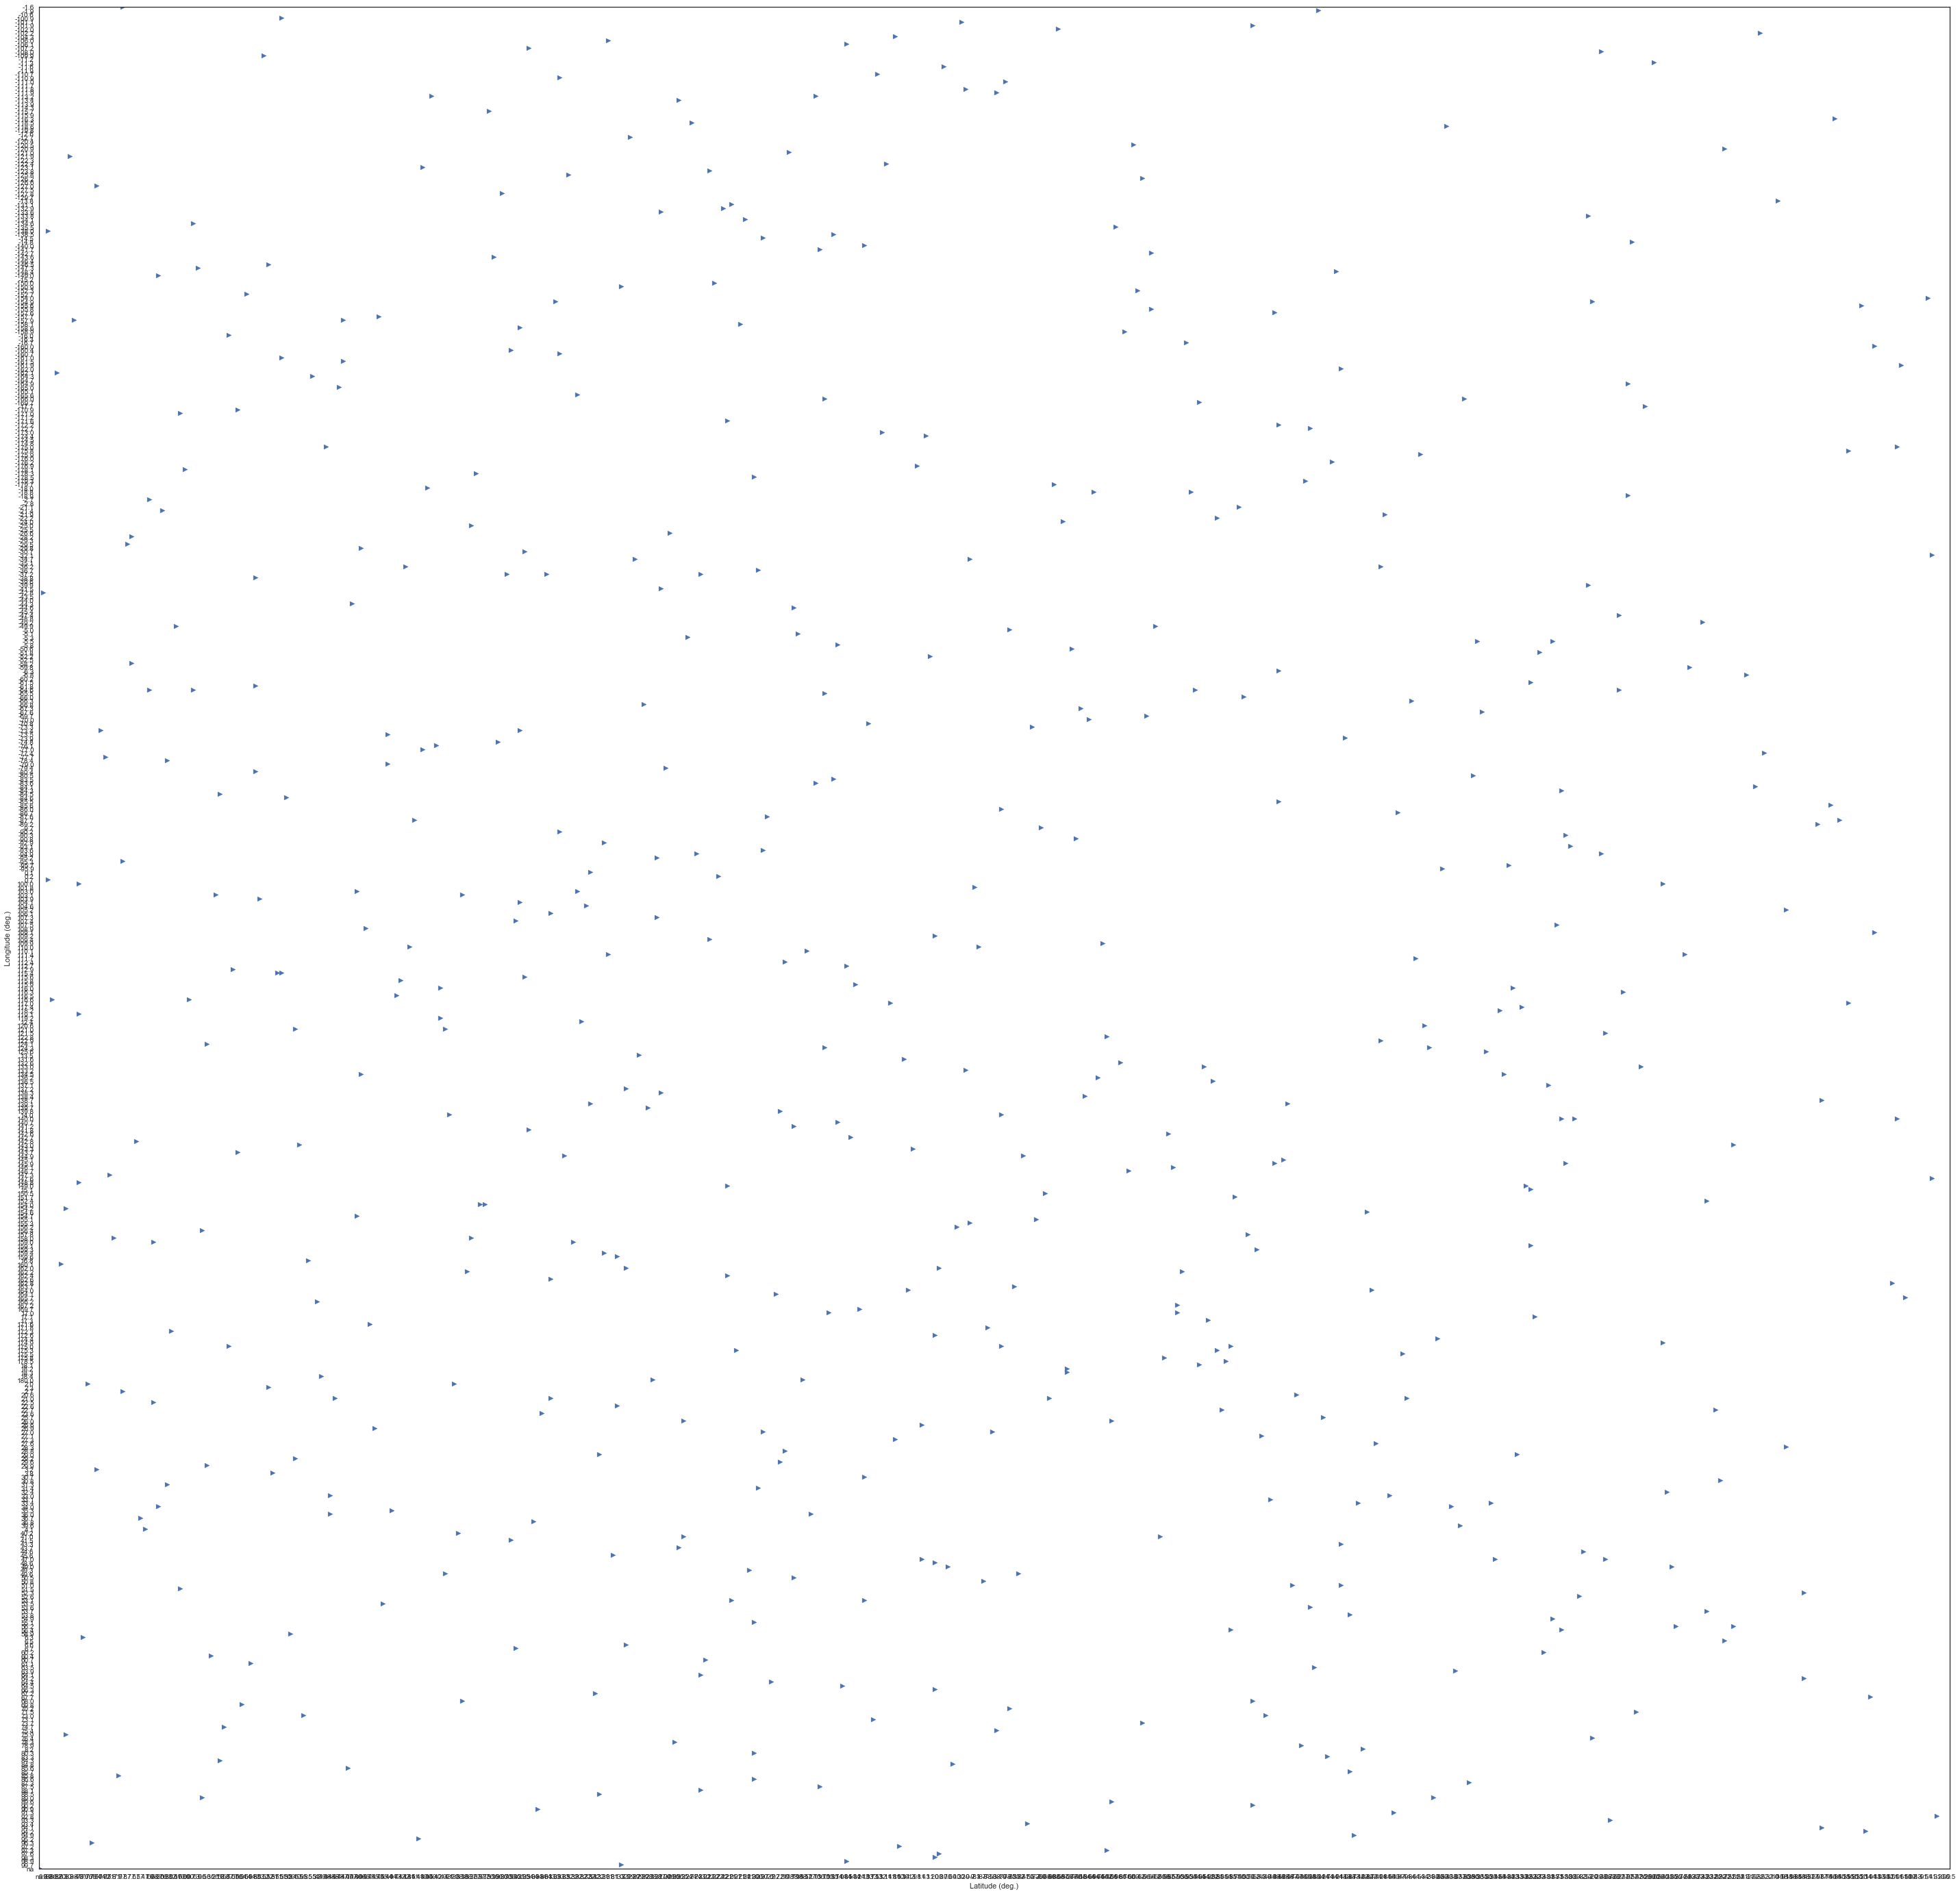

In [91]:
def Latitude(self):
    help = str(self['Latitude (deg.)'])
    if help[-1] == 'S':
        help = '-' + help[0:len(help)-1]
    else:
        help = help[0:len(help)-1]
    return help

def Longitude (self):
    help = str(self['Longitude (deg.)'])
    if help[-1] == 'W':
        help = '-' + help[0:len(help)-1]
    else:
        help = help[0:len(help)-1]
    return help

FB_2 = FB.copy()

FB_2['Latitude (deg.)'] = FB_2.apply(Latitude,axis=1)
FB_2['Longitude (deg.)'] = FB_2.apply(Longitude,axis=1)

fig = plt.figure(figsize=(50,50))
plt.scatter(FB_2['Latitude (deg.)'], FB_2['Longitude (deg.)'] , marker='>')
#plt.legend()

FB_2.sort_values('Latitude (deg.)', ascending=False,inplace=True)
plt.xlim(FB_2.iloc[1]['Latitude (deg.)'], FB_2.iloc[-1]['Latitude (deg.)'])

FB_2.sort_values('Longitude (deg.)', ascending=False,inplace=True)
plt.ylim(FB_2.iloc[1]['Longitude (deg.)'], FB_2.iloc[-1]['Longitude (deg.)'])

plt.xlabel('Latitude (deg.)')
plt.ylabel('Longitude (deg.)')
#plt.grid()
plt.show()


## 4. Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график.##

Autumn: 0.253129346314


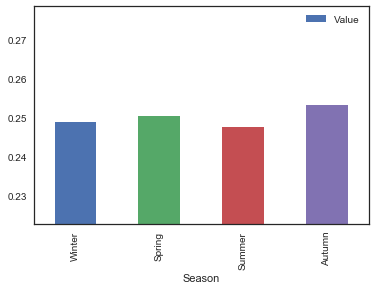

In [77]:
def month(self):
    help = str(self['Peak Brightness Date/Time (UT)'])
    return help[5:7]

FB_2 = FB.copy()
FB_2 = FB_2.drop_duplicates()
FB_2['Peak Brightness Date/Time (UT)'] = FB_2.apply(month,axis=1)
FB_2 = FB_2.groupby('Peak Brightness Date/Time (UT)')[['Peak Brightness Date/Time (UT)']].count()
season = ['Winter', 'Spring', 'Summer', 'Autumn']
value = [(FB_2.iloc[0,0] + FB_2.iloc[1,0] + FB_2.iloc[11,0])/len(FB),
         (FB_2.iloc[2,0] + FB_2.iloc[3,0] + FB_2.iloc[4,0])/len(FB),
         (FB_2.iloc[5,0] + FB_2.iloc[6,0] + FB_2.iloc[7,0])/len(FB),
         (FB_2.iloc[8,0] + FB_2.iloc[9,0] + FB_2.iloc[10,0])/len(FB)]
print(str(season[value.index(max(value))]) + ": " + str(max(value)))
table = pd.DataFrame(dict([('Season',season), ('Value',value)])).plot(kind='bar',
                                                                      x='Season',
                                                                      y='Value',
                                                                      ylim=((min(value))*0.9, max(value)*1.1))
plt.show()

## 5. Удалить строки данных, в которых для метеоритов не указана скорость.

In [71]:
FB_2 = FB_copy.copy()
FB_2 = FB_2.dropna(subset=['Velocity (km/s)'])
FB_2

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
1,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
2,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
3,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
4,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.600
5,2017-05-24 07:03:03,9.1S,101.8E,46.0,18.4,-6.5,-16.5,-5.0,9.000000e+10,0.280
6,2017-04-30 21:28:28,25.7S,56.2E,32.4,21.5,-13.4,-14.2,8.9,1.500000e+11,0.430
7,2017-03-09 04:16:37,40.5N,18.0W,23.0,36.5,-15.3,25.8,-20.8,4.000000e+11,1.000
8,2017-02-25 01:22:59,29.5N,13.5E,25.4,12.2,-7.6,-9.3,2.2,6.500000e+10,0.210
9,2017-02-18 19:48:29,6.2N,60.4E,38.0,24.2,-6.6,-22.7,-5.3,2.950000e+11,0.790


## 7. Заполните строки в которых для метеоритов не указана скорость.

In [72]:
FB_2 = FB_copy.copy()
FB_2['Velocity (km/s)'] = FB_2['Velocity (km/s)'].fillna(np.random.uniform(low=FB_2['Velocity (km/s)'].min(),high=FB_2['Velocity (km/s)'].max()))
FB_2

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.120
1,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.230
2,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.290
3,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.520
4,2017-06-20 13:41:32,54.2S,133.0E,33.3,13.6,8.7,-5.7,8.8,6.360000e+11,1.600
5,2017-05-24 07:03:03,9.1S,101.8E,46.0,18.4,-6.5,-16.5,-5.0,9.000000e+10,0.280
6,2017-04-30 21:28:28,25.7S,56.2E,32.4,21.5,-13.4,-14.2,8.9,1.500000e+11,0.430
7,2017-03-09 04:16:37,40.5N,18.0W,23.0,36.5,-15.3,25.8,-20.8,4.000000e+11,1.000
8,2017-02-25 01:22:59,29.5N,13.5E,25.4,12.2,-7.6,-9.3,2.2,6.500000e+10,0.210
9,2017-02-18 19:48:29,6.2N,60.4E,38.0,24.2,-6.6,-22.7,-5.3,2.950000e+11,0.790


## 6. Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов.

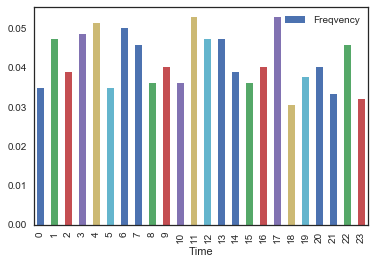

In [73]:
def time(self):
    help = str(self['Peak Brightness Date/Time (UT)'])
    return help[11:13]

FB_2 = FB.copy()
FB_2 = FB_2.drop_duplicates()
FB_2['Peak Brightness Date/Time (UT)'] = FB_2.apply(time, axis=1)
FB_2 = FB_2.groupby('Peak Brightness Date/Time (UT)')[['Peak Brightness Date/Time (UT)']].count()
time = list(range(24))
freqvency = []
for number in range(24):
    freqvency.append(FB_2.iloc[number,0]/len(FB))
table = pd.DataFrame(dict([('Freqvency',freqvency), ('Time',time)])).plot(kind='bar',
                                                                      x='Time',
                                                                      y='Freqvency')
plt.show()

## 8. Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики).

10: 0.0904033379694


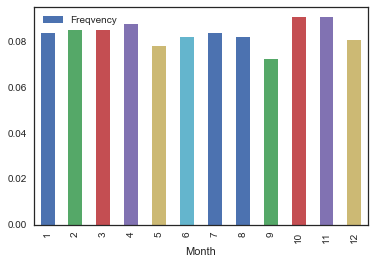

In [74]:
def time(self):
    help = str(self['Peak Brightness Date/Time (UT)'])
    return help[5:7]

FB_2 = FB.copy()
FB_2 = FB_2.drop_duplicates()
FB_2['Peak Brightness Date/Time (UT)'] = FB_2.apply(time, axis=1)
FB_2 = FB_2.groupby('Peak Brightness Date/Time (UT)')[['Peak Brightness Date/Time (UT)']].count()
month = list(range(1, 13))
freqvency = []
for number in range(12):
    freqvency.append(FB_2.iloc[number,0]/len(FB))
print(str(month[freqvency.index(max(freqvency))]) + ": " + str(max(freqvency)))
table = pd.DataFrame(dict([('Freqvency',freqvency), ('Month', month)])).plot(kind='bar',
                                                                      x='Month',
                                                                      y='Freqvency')
plt.show()

## 9. Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [98]:

FB_2 = FB_copy.copy()
pearson_correlation, pearson_pvalue = sc.pearsonr(FB_2['Altitude (km)'], FB_2['Total Radiated Energy (J)'])
print('Pearson сorrelation - ', pearson_correlation)
print('Pearson p-value - ', pearson_pvalue)

spearman_correlation, spearman_pvalue = sc.spearmanr(FB_2['Altitude (km)'], FB_2['Total Radiated Energy (J)'])
print('Spearman сorrelation - ', spearman_correlation)
print('Spearman p-value - ', spearman_pvalue)

Pearson сorrelation -  -0.120137927778
Pearson p-value -  0.136488313937
Spearman сorrelation -  -0.0916036702099
Spearman p-value -  0.256958107349


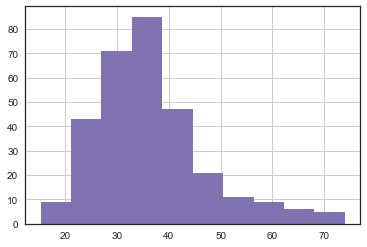

In [96]:
FB_2['Altitude (km)'].hist()
plt.show()

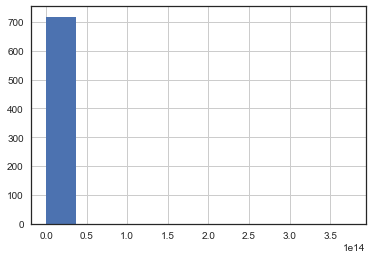

In [97]:
FB_2['Total Radiated Energy (J)'].hist()
plt.show()